# Fiche TP N° 02: Feature extraction and embeddings

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score

### A. Préparation de données

In [2]:
import pandas as pd

data = pd.read_csv('spooky_treated.csv')
data.head(10)

,author,text
0,EAP,"['process', 'however', 'afforded', 'means', 'a..."
1,HPL,"['never', 'occurred', 'fumbling', 'might', 'me..."
2,EAP,"['left', 'hand', 'gold', 'snuff', 'box', 'cape..."
3,MWS,"['lovely', 'spring', 'looked', 'windsor', 'ter..."
4,HPL,"['finding', 'nothing', 'else', 'even', 'gold',..."
5,MWS,"['youth', 'passed', 'solitude', 'best', 'years..."
6,EAP,"['astronomer', 'perhaps', 'point', 'took', 're..."
7,EAP,"['surcingle', 'hung', 'ribands', 'body']"
8,EAP,"['knew', 'could', 'say', 'stereotomy', 'withou..."
9,MWS,"['confess', 'neither', 'structure', 'languages..."


### B. Encodage de la variable à prédire

In [3]:
data['author'].unique()

array(['EAP', 'HPL', 'MWS'], dtype=object)

In [4]:
X=data.drop(['author'],axis='columns')
X.head()

,text
0,"['process', 'however', 'afforded', 'means', 'a..."
1,"['never', 'occurred', 'fumbling', 'might', 'me..."
2,"['left', 'hand', 'gold', 'snuff', 'box', 'cape..."
3,"['lovely', 'spring', 'looked', 'windsor', 'ter..."
4,"['finding', 'nothing', 'else', 'even', 'gold',..."


In [5]:
y=data.drop(['text'],axis='columns')
y.head()

,author
0,EAP
1,HPL
2,EAP
3,MWS
4,HPL


In [6]:
y = pd.get_dummies(y, columns=['author'])
y = y.astype(int)

In [7]:
y

,author_EAP,author_HPL,author_MWS
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
19574,1,0,0
19575,1,0,0
19576,1,0,0
19577,1,0,0


In [8]:
y= y.rename(columns={'author_EAP': 'EAP', 'author_HPL': 'HPL','author_MWS':'MWS'})

In [9]:
y.head()

,EAP,HPL,MWS
0,1,0,0
1,0,1,0
2,1,0,0
3,0,0,1
4,0,1,0


### C. Construction des bases d’entraînement et de test

In [10]:
X_train_nos, X_test_nos, y_train_nos, y_test_nos = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    )

In [11]:
y_train_nos.head()

,EAP,HPL,MWS
12583,0,0,1
8381,0,1,0
9920,0,1,0
3391,0,0,1
16640,0,1,0


# Split with stratify

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=33,
                                                    stratify = y.values)

In [13]:
print('X shape:', X.shape)
print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('Y shape:', y.shape)
print('Y train shape:', y_train.shape)
print('Y test shape:', y_test.shape)

X shape: (19579, 1)
X train shape: (15663, 1)
X test shape: (3916, 1)
Y shape: (19579, 3)
Y train shape: (15663, 3)
Y test shape: (3916, 3)


In [14]:
# Display a sample of the training set
print("Training Set:")
print(pd.concat([X_train, y_train], axis=1).head())

# Display a sample of the testing set
print("\nTesting Set:")
print(pd.concat([X_test, y_test], axis=1).head())

Training Set:
                                                    text  EAP  HPL  MWS
11612  ['dress', 'trimmings', 'green', 'agraffas', 's...    1    0    0
4926   ['true', 'spirit', 'reckless', 'enterprise', '...    0    0    1
7067   ['iranon', 'singer', 'songs', 'said', 'heart',...    0    1    0
7225   ['saw', 'indistinctly', 'much', 'effort', 'per...    1    0    0
4389   ['least', 'long', 'period', 'inventor', 'lomba...    1    0    0

Testing Set:
                                                    text  EAP  HPL  MWS
15931                              ['must', 'something']    0    1    0
18593  ['urge', 'walk', 'gradually', 'changing', 'urg...    0    1    0
5104   ['contrary', 'could', 'means', 'account', 'ove...    1    0    0
15466                                        ['dispute']    0    0    1
13473  ['reasoners', 'object', 'merely', 'show', 'bod...    1    0    0


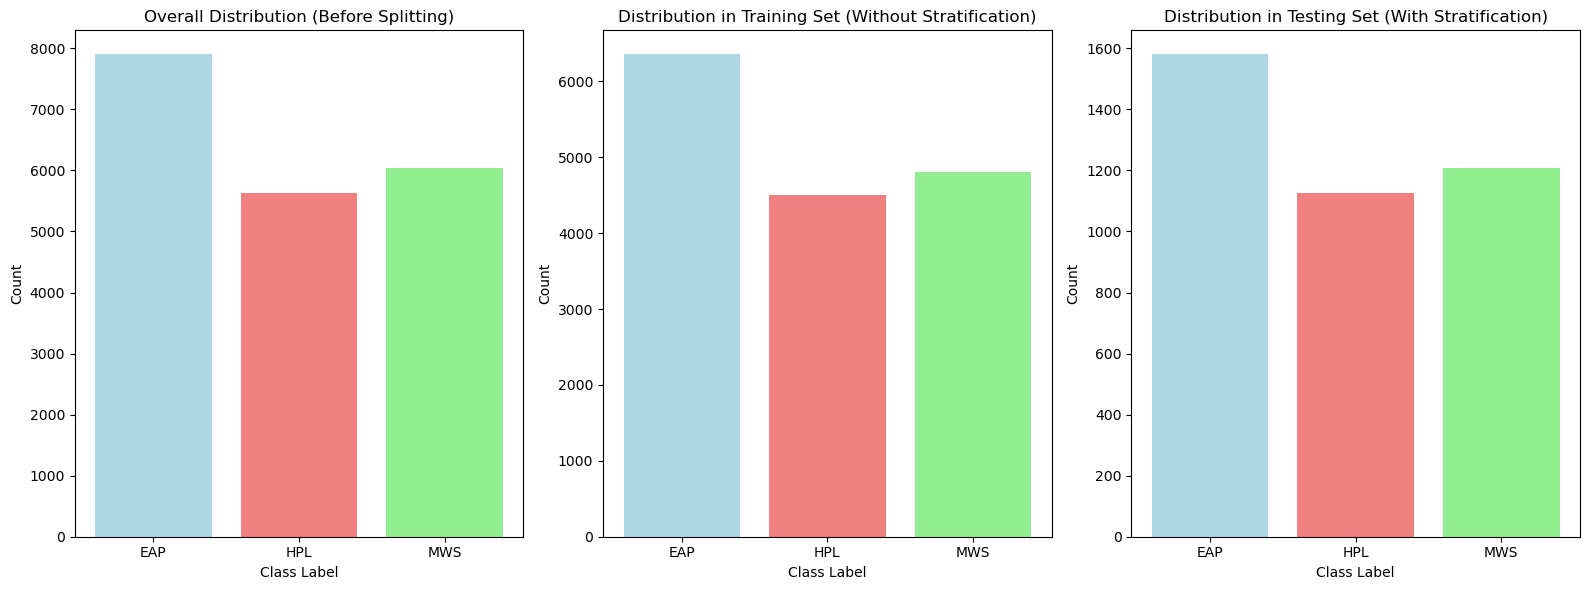

In [15]:
import matplotlib.pyplot  as plt 
plt.figure(figsize=(16, 6))

plt.subplot(1, 3, 1)
plt.bar(y.sum().index, y.sum().values,color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Overall Distribution (Before Splitting)')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.bar(y_train_nos.sum().index, y_train_nos.sum().values,color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution in Training Set (Without Stratification)')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.bar(y_test.sum().index, y_test.sum().values,color=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution in Testing Set (With Stratification)')
plt.xlabel('Class Label')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### D. Méthodes de vectorisation

##### 1. Utiliser la méthode de fréquence lexicale et one-hot encoding pour vectoriser le dataset d’entrainement et du test.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

# création d'un objet CountVectorizer pour effectuer la fréquence lexicale et l'encodage one-hot
# (
#    si binary=False => fréquence lexicale
#    si binary=True => one-hot encoding
#)
# la matrice de fréquence lexicale contient les fréquences des mots,
# tandis que la matrice d'encodage one-hot contient des vecteurs binaires indiquant la présence ou l'absence
# de chaque mot.

vectorizer = CountVectorizer(binary=False,analyzer= 'word', stop_words='english')
vectorizer_onehot = CountVectorizer(binary=True , analyzer= 'word', stop_words='english')

vectorizer.fit(X_train['text'])
vectorizer_onehot.fit(X_train['text'])

train_fl = vectorizer.transform(X_train['text'])
test_fl = vectorizer.transform(X_test['text'])

train_oneh = vectorizer_onehot.transform(X_train['text'])
test_oneh = vectorizer_onehot.transform(X_test['text'])

In [17]:
count_array_cv = train_fl.toarray()
df = pd.DataFrame(data=count_array_cv,columns = vectorizer.get_feature_names_out())
df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abashed,...,æmilianus,æneid,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
count_array_oneh = train_oneh.toarray()
df = pd.DataFrame(data=count_array_oneh,columns = vectorizer_onehot.get_feature_names_out())
df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abashed,...,æmilianus,æneid,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15660,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### 2 et 3. Entrainer un modèle de vectorisation TF-IDF sur la partie d’entrainement et vectorisez-le. (et de test)

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# création d'un objet TfidfVectorizer pour effectuer la vectorisation TF-IDF
tfidf_vectorizer = TfidfVectorizer(analyzer= 'word', stop_words='english')

# ajustement du vectorizer sur le texte d'entraînement
tfidf_vectorizer.fit(X_train['text'])

# transformation du texte d'entraînement et de test en vecteurs TF-IDF
train_tfidf = tfidf_vectorizer.transform(X_train['text'])
test_tfidf = tfidf_vectorizer.transform(X_test['text'])

In [20]:
count_array_tfidf = train_tfidf.toarray()
df = pd.DataFrame(data=count_array_tfidf,columns = tfidf_vectorizer.get_feature_names_out())
df

,aaem,ab,aback,abaft,abandon,abandoned,abandoning,abandonment,abaout,abashed,...,æmilianus,æneid,æronaut,æronauts,ærostation,æschylus,élite,émeutes,οἶδα,υπνος
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15660,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15661,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lexical frequency is a simple measure of how often a word appears in a document. It is calculated by dividing the number of occurrences of a word by the total number of words in the document.

TF-IDF (Term Frequency-Inverse Document Frequency) is a more sophisticated measure that takes into account both the frequency of a word in a document and the frequency of the word in the entire corpus. It is calculated by multiplying the lexical frequency of a word by the inverse document frequency of the word.

### E. Entrainement

#### 1. Créer trois modèles du type MLPClassifier. (Vous pouvez changer l’algorithme d’apprentissage : utiliser les autres algorithmes de scikit-learn)

In [21]:
from sklearn.neural_network import MLPClassifier

model1 = MLPClassifier(hidden_layer_sizes=(32,), activation='relu', solver='adam', random_state=1)
model2 = MLPClassifier(hidden_layer_sizes=(16, 16), activation='relu', solver='adam', random_state=1)
model3 = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='relu', solver='adam', random_state=1)


#### 2,3 et 4.
 - Entrainer ces trois modèles sur les trois représentations vectorielles
 - Prédire les classes en appliquant les trois modèles sur les trois représentations d’entrainement.
 - Afficher le rapport de classification en utilisant les mesures de performance (accuracy, precision, recall…).


In [22]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pickle, os
from sklearn.exceptions import UndefinedMetricWarning
import warnings
# Create the directory if it doesn't exist
os.makedirs('models', exist_ok=True)
import time

models = [model1, model2, model3]
representations = [train_fl, train_oneh, train_tfidf]

for i, model in enumerate(models):
    print(f"MLP Model n˚{i + 1}")
    for j, representation in enumerate(representations):

        print(f"The model is training on the representation n˚{j + 1}...")
        start_time = time.time()
        model.fit(representation, y_train)
        end_time = time.time()
        print(f"✅Training completed within: {end_time - start_time:.6f} seconds")
        print(f"------------------------------------------------------------------")
        filename = f'models/model{i+1}.{j+1}.sav'
        pickle.dump(model, open(filename, 'wb'))

        y_pred = model.predict(representation)

        report = classification_report(y_train, y_pred, output_dict=True)
        report_df = pd.DataFrame(report).transpose()

        report_df.to_csv(f"metrics/model{i+1}.{j+1}.csv")

print("Training completed!")


MLP Model n˚1
The model is training on the representation n˚1...
✅Training completed within: 837.500425 seconds
------------------------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is training on the representation n˚2...
✅Training completed within: 758.312445 seconds
------------------------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The model is training on the representation n˚3...
✅Training completed within: 874.893491 seconds
------------------------------------------------------------------
MLP Model n˚2
The model is training on the representation n˚1...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅Training completed within: 297.894916 seconds
------------------------------------------------------------------
The model is training on the representation n˚2...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅Training completed within: 255.538996 seconds
------------------------------------------------------------------
The model is training on the representation n˚3...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅Training completed within: 433.473668 seconds
------------------------------------------------------------------
MLP Model n˚3
The model is training on the representation n˚1...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅Training completed within: 393.010804 seconds
------------------------------------------------------------------
The model is training on the representation n˚2...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅Training completed within: 376.417279 seconds
------------------------------------------------------------------
The model is training on the representation n˚3...


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


✅Training completed within: 321.259453 seconds
------------------------------------------------------------------
Training completed!


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
metrics = []
for i in range(3):
    for j in range(3):
        filename = f'metrics/model{i+1}.{j+1}.csv'
        df = pd.read_csv(filename, index_col=0)
        metrics.append(df)

In [24]:
metrics[0]

,precision,recall,f1-score,support
0,0.999525,0.998259,0.998892,6320.0
1,0.999556,0.999113,0.999334,4508.0
2,0.999793,0.997104,0.998447,4835.0
micro avg,0.999616,0.998149,0.998882,15663.0
macro avg,0.999624,0.998159,0.998891,15663.0
weighted avg,0.999616,0.998149,0.998882,15663.0
samples avg,0.998117,0.998149,0.998127,15663.0


### F. Test


##### Pour Model i et La Representation 1 (CountVect ) et 2 (one hot) et 3 (TF-IDF)

In [25]:
models = [model1, model2, model3]
test_representations = [test_fl, test_oneh, test_tfidf]

for i, model in enumerate(models):
    for j, representation in enumerate(test_representations):

        filename = f"models/model{i+1}.{j+1}.sav"
        model = pickle.load(open(filename, 'rb'))

        y_pred = model.predict(representation)

        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report).transpose()

        report_df.to_csv(f"metrics/test_model{i+1}.{j+1}.csv")

In [26]:
metrics = []
for i in range(len(models)):
    for j in range(len(test_representations)):
        filename = f'metrics/test_model{i+1}.{j+1}.csv'
        df = pd.read_csv(filename, index_col=0)
        metrics.append(df)

In [27]:
metrics[0]

,precision,recall,f1-score,support
0,0.729244,0.744937,0.737007,1580.0
1,0.745301,0.703638,0.723870,1127.0
2,0.698401,0.758478,0.727201,1209.0
micro avg,0.723378,0.737232,0.730239,3916.0
macro avg,0.724315,0.735684,0.729359,3916.0
weighted avg,0.724343,0.737232,0.730199,3916.0
samples avg,0.709270,0.737232,0.718590,3916.0


### G. Vectorisations basées sur les embeddings de mots

#### a. Word2Vec (CBOW and Skip gram)

#### Tokenization function

In [28]:
la = LabelEncoder()
data['author_encoded'] = la.fit_transform(data['author'])

X_train, X_test, y_train, y_test = train_test_split(data['text'].values,
                                                    data['author_encoded'].values,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify = data['author_encoded'].values)


In [29]:
from nltk.tokenize import word_tokenize
def tokenize(text):
    return word_tokenize(text)

train_tokens = [tokenize(text) for text in X_train]
test_tokens = [tokenize(text) for text in X_test]


#### Mean vector function

In [30]:
def get_mean_vector(vectors, words):
    words = [word for word in words if word in vectors]
    if len(words) >= 1:
        return np.mean(vectors[words], axis=0)
    else:
        return np.zeros(100)

#### Skip-Gram

In [31]:
# Skip-Gram
from gensim.models.word2vec import Word2Vec
from gensim.models import FastText, KeyedVectors
model_sg = Word2Vec(train_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=1)

train_sg = [get_mean_vector(model_sg.wv, words) for words in train_tokens]
test_sg = [get_mean_vector(model_sg.wv, words) for words in test_tokens]

CBOW

In [32]:
# CBOW
model_cbow = Word2Vec(train_tokens, vector_size=100, window=5, min_count=1, workers=4, sg=0)

train_cbow = [get_mean_vector(model_cbow.wv, words) for words in train_tokens]
test_cbow = [get_mean_vector(model_cbow.wv, words) for words in test_tokens]

The difference between Skip-Gram and CBOW is on parameter sg = 0 on CBOW and sg = 1 on Skip-Gram

#### Glove

In [34]:
model_glove = KeyedVectors.load_word2vec_format('glove.6B.100d.txt', binary=False, no_header=True)

train_glove = [get_mean_vector(model_glove, words) for words in train_tokens]
test_glove = [get_mean_vector(model_glove, words) for words in test_tokens]

#### FAST TEXT

In [35]:

model_fasttext = FastText(train_tokens, vector_size=100, window=5, min_count=1, workers=4)

train_fasttext = [get_mean_vector(model_fasttext.wv, words) for words in train_tokens]
test_fasttext = [get_mean_vector(model_fasttext.wv, words) for words in test_tokens]

## Training / Testing

In [36]:
models = [model1, model2, model3]
representations = [train_sg, train_cbow, train_glove, train_fasttext]
test_representations = [test_sg, test_cbow, test_glove, test_fasttext]

In [37]:
def train_all(models, representation, y_train):
    for i, model in enumerate(models):
        print(f"MLP Model n˚{i + 1}")
        for j, representation in enumerate(representations):
    
            print(f" • The model is training on the representation n˚{j + 1}...")
            start_time = time.time()
            
            print(y_train.shape)
            model.fit(representation, y_train)
            end_time = time.time()
            print(f"✔️ Training completed within: {end_time - start_time:.6f} seconds")
            print(f"------------------------------------------------------------------")
            filename = f'models/finalized_model{i+1}.{j+1}.sav'
            pickle.dump(model, open(filename, 'wb'))
    
            y_pred = model.predict(representation)
    
            report = classification_report(y_train, y_pred, output_dict=True, zero_division=0)
            report_df = pd.DataFrame(report).transpose()
    
            report_df.to_csv(f"metrics/model{i+1}.{j+1}.csv")
    print("✅ Training completed!")

#### Applying the models on the train representations

In [38]:
#### Applying the models on the train representations
train_all(models, representations, y_train)

MLP Model n˚1
 • The model is training on the representation n˚1...
(15663,)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


✔️ Training completed within: 30.429313 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚2...
(15663,)
✔️ Training completed within: 12.411395 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚3...
(15663,)
✔️ Training completed within: 8.442138 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚4...
(15663,)
✔️ Training completed within: 18.354839 seconds
------------------------------------------------------------------
MLP Model n˚2
 • The model is training on the representation n˚1...
(15663,)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


✔️ Training completed within: 30.949103 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚2...
(15663,)
✔️ Training completed within: 20.413685 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚3...
(15663,)
✔️ Training completed within: 7.769463 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚4...
(15663,)
✔️ Training completed within: 13.925026 seconds
------------------------------------------------------------------
MLP Model n˚3
 • The model is training on the representation n˚1...
(15663,)
✔️ Training completed within: 36.327971 seconds
------------------------------------------------------------------
 • The model is training on the representation n˚2...
(15663,)
✔️ Training completed within: 14.489486 seconds
-------------------------------------------------

#### Applying the models on the train representations

In [39]:
for i, model in enumerate(models):
    for j, representation in enumerate(test_representations):

        filename = f"models/finalized_model{i+1}.{j+1}.sav"
        model = pickle.load(open(filename, 'rb'))

        y_pred = model.predict(representation)

        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        report_df = pd.DataFrame(report).transpose()

        report_df.to_csv(f"metrics/test_model{i+1}.{j+1}.csv")

In [48]:

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1-Score'])
models_names = ['MLP-32_CV', 'MLP-32_OneHot', 'MLP-32_TFIDF', 'MLP-16-16_CV', 'MLP-16-16_OneHot', 'MLP-16-16_TFIDF', 'MLP-32-16-8_CV', 'MLP-32-16-8_OneHot', 'MLP-32-16-8_TFIDF']
k = 0
for i in range(3):
    model_name = f"Model {i+1}"
    
    for j in range(3):
        filename = f'metrics/test_model{i+1}.{j+1}.csv'
        df = pd.read_csv(filename, index_col=0)
        
        accuracy = df.loc['accuracy', 'precision']
        recall = df.loc['macro avg', 'recall']
        precision = df.loc['macro avg', 'precision']
        f1_score = df.loc['macro avg', 'f1-score']
        
        metrics_df.loc[k] = [models_names[k], accuracy, recall, precision, f1_score]
        k += 1
    
   

In [49]:
metrics_df

,Model,Accuracy,Recall,Precision,F1-Score
0,MLP-32_CV,0.589888,0.579646,0.586748,0.581840
1,MLP-32_OneHot,0.401685,0.362245,0.378498,0.308376
2,MLP-32_TFIDF,0.395812,0.352275,0.249767,0.279738
3,MLP-16-16_CV,0.581716,0.552720,0.626167,0.548976
4,MLP-16-16_OneHot,0.395046,0.339745,0.393382,0.262682
5,MLP-16-16_TFIDF,0.400919,0.370995,0.258887,0.303283
6,MLP-32-16-8_CV,0.602400,0.592930,0.600661,0.595293
7,MLP-32-16-8_OneHot,0.408836,0.360943,0.408773,0.286244
8,MLP-32-16-8_TFIDF,0.400664,0.370529,0.258679,0.302870


### Training CBOW or Skip Gram from scratch

### skip-gram model from scratch using PyTorch to build and train the model

In [51]:
!pip install torch torchvision
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/59/1f/4975d1ab3ed2244053876321ef65bc02935daed67da76c6e7d65900772a3/torch-2.2.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/e7/45/419aa0b37254f1fd62b45bb63836066c5eb81e37d70940e0491e95167eed/torchvision-0.17.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/f9/de/dc04a3ea60b22624b51c703a84bbe0184abcd1d0b9bc8074b5d6b7ab90bb/typing_extensions-4.10.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/198.6 MB 656.4 kB/s eta 0:05:03
   ---------------------------------------- 0.1/198.6 MB 939.4 kB/s eta 0:03:32
   ---------------------------------------- 0.2/19

### The Model

In [52]:
class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, target):
        embeds = self.embedding(target)
        out = self.linear(embeds)
        return out

### Generate training samples

In [53]:
import pandas as pd
import numpy as np
df_c=pd.read_csv('preprocessed_data.csv')
df_c=df_c.drop(columns=['id','author'],axis=0)
df_c.head()

,text
0,proces however afforded means ascertaining dim...
1,never occurred fumbling might mere mistake
2,left hand gold snuff box capered hil cutting m...
3,lovely spring looked windsor terrace sixteen f...
4,finding nothing else even gold superintendent ...


In [54]:
df_np=df_c.values

In [55]:
df_np

array([['proces however afforded means ascertaining dimensions dungeon might make circuit return point whence set without aware fact perfectly uniform seemed wal'],
       ['never occurred fumbling might mere mistake'],
       ['left hand gold snuff box capered hil cutting manner fantastic steps took snuff incessantly air greatest possible self satisfaction'],
       ...,
       ['mais il faut agir say frenchman never faints outright'],
       ['item news like strikes us coolly received'],
       ['laid gnarled claw shoulder seemed shaking altogether mirth']],
      dtype=object)

In [56]:
def generate_training_data(corpus, window_size):
    data = []
    for sentence in corpus:
        tokens = sentence.split()
        for i, target_word in enumerate(tokens):
            for j in range(i - window_size, i + window_size + 1):
                if j != i and j >= 0 and j < len(tokens):
                    context_word = tokens[j]
                    data.append((target_word, context_word))
    return data

#### Hyperparameters

In [57]:
embedding_dim = 100
window_size = 1
learning_rate = 0.001
num_epochs = 20

In [65]:
corpus = []
for sentence in df_np.flatten():
    if isinstance(sentence, str):
        corpus.append(sentence)
    else:
        corpus.append(str(sentence))

training_data = generate_training_data(corpus, window_size)

### Build the vocabulary

In [66]:
vocab = list(set([word for sentence in corpus for word in sentence.split()]))
vocab_size = len(vocab)
word_to_idx = {word: i for i, word in enumerate(vocab)}

### Initialisation

In [67]:
model = SkipGram(vocab_size, embedding_dim)

### loss function and optimizer

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Training

In [69]:
loss_values = []
accuracy_values = []
for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for target_word, context_word in training_data:

        target = Variable(torch.LongTensor([word_to_idx[target_word]]))
        context = Variable(torch.LongTensor([word_to_idx[context_word]]))

        # Forward pass
        output = model(target)

        # Compute the loss
        loss = criterion(output, context)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        
        # Compute accuracy
        _, predicted = torch.max(output.data, 1)
        correct_predictions += (predicted == context).sum().item()
        total_predictions += context.size(0)

    # Compute epoch loss and accuracy
    epoch_loss = total_loss / len(training_data)
    epoch_accuracy = correct_predictions / total_predictions

    # Append loss and accuracy values
    loss_values.append(epoch_loss)
    accuracy_values.append(epoch_accuracy)

    # Print the average loss and accuracy for the epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}")

### Accuracy & loss Visualization

In [ ]:
# Plot loss
plt.plot(loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

# Plot accuracy
plt.plot(accuracy_values)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()